<a href="https://colab.research.google.com/github/Minji-torii/flaskProject/blob/main/MoodyFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

&+------------------------------start------------------------+&


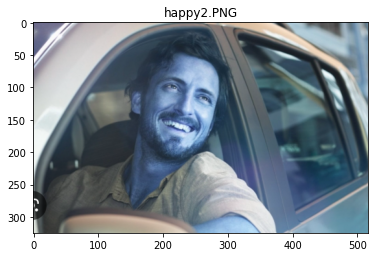

In [ ]:
######################
### face detection ###
######################

# get the image from the image 'faceImages' folder
from google.colab.patches import cv2
from matplotlib import pyplot as plt

print("&+------------------------------start------------------------+&")
imgPath = '/content/drive/MyDrive/faceImages/happy2.PNG'
imgName = 'happy2.PNG'
# img = cv2.imread(imgPath+'/'+imgName)
img = cv2.imread(imgPath)

plt.imshow(img)
plt.title(imgName)
plt.show()

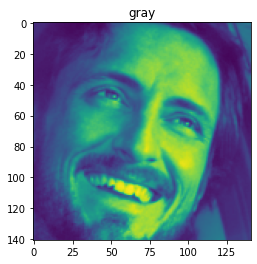

In [ ]:
# convert to image to gray image
faceCascade = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(imgGray, 1.2, 8)

for(x,y,w,h) in faces:
  # cv2.rectangle(imgGray, (x,y),(x+w),(y+h), (255,0,0), 2)
  img2 = imgGray[y:y+h, x:x+w]
plt.imshow(img2)
plt.title("gray")
plt.show()

In [ ]:
cv2.imwrite('/content/target/target.PNG', img2)

True

In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
!pip install fastkaggle
from fastkaggle import *

path = '/content/drive/MyDrive/train'

# get train images
files = get_image_files(path)

dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(192,method='squish')
)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# model learning
learn = vision_learner(dls, resnet18, metrics=error_rate)
print(learn)

learn.fine_tune(8)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,1.813141,1.512925,0.573016,56:17


epoch,train_loss,valid_loss,error_rate,time
0,1.282531,1.182141,0.449384,01:38
1,1.028927,1.086863,0.406147,01:37
2,0.779977,1.185930,0.408404,01:38
3,0.411721,1.373461,0.399896,01:38
4,0.155185,1.666551,0.383747,01:38
5,0.073521,1.831876,0.384615,01:38
6,0.022284,1.872511,0.376975,01:37
7,0.015104,1.878374,0.376975,01:38


In [ ]:
import pickle
learn.export('/content/drive/MyDrive/model/model2.pkl')

predict start


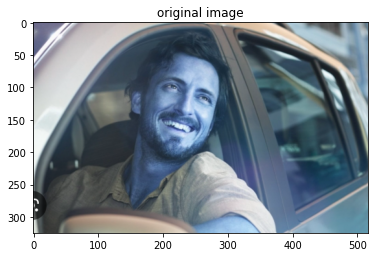



This is a : happy.
Probability of this being a Baked angry is : 0.000000.
Probability of this being a Baked disgusted is : 0.000000.
Probability of this being a Baked fearful is : 0.000000.
Probability of this being a Baked happy is : 1.000000.
Probability of this being a Baked neutral is : 0.000000.
Probability of this being a Baked sad is : 0.000000.
Probability of this being a Baked surprised is : 0.000000.


In [ ]:
# result
print("predict start")
lable,_,probs = learn.predict('/content/target/target.PNG')

plt.imshow(img)
plt.title('original image')
plt.show()
print(f'\n\nThis is a : {lable}.')
print(f'Probability of this being a Baked angry is : {probs[0]:4f}.')
print(f'Probability of this being a Baked disgusted is : {probs[1]:4f}.')
print(f'Probability of this being a Baked fearful is : {probs[2]:4f}.')
print(f'Probability of this being a Baked happy is : {probs[3]:4f}.')
print(f'Probability of this being a Baked neutral is : {probs[4]:4f}.')
print(f'Probability of this being a Baked sad is : {probs[5]:4f}.')
print(f'Probability of this being a Baked surprised is : {probs[6]:4f}.')

In [ ]:
emo_num = 0
if(lable == "angry"): emo_num = 1
elif(lable == "disgust"): emo_num = 2
elif(lable == "fear"): emo_num = 3
elif(lable == "happy"): emo_num = 4
elif(lable == "neutral"): emo_num = 5
elif(lable == "sad"): emo_num = 6
elif(lable == "surprise"): emo_num = 7

print(emo_num)

4
